# Project 3 - COVID-19 
__Fehmi Can Özer__  
__2407583__

<span style="color:blue; font-size:1.3em">Part b.</span>

# Import Libraries and Datasets

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
cov = pd.read_csv('cov.csv') #covid-19 dataset
gdp = pd.read_csv('gdp.csv') #gdp dataset
mob = pd.read_csv('mob.csv') #google mobility dataset

/Users/canozer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Preprocessing

In [3]:
gdp.rename(columns={'Country Code':'countryterritoryCode'}, inplace=True)
gcov=pd.merge(cov,gdp, on = 'countryterritoryCode')
data = pd.merge(gcov,mob, on =['CountryCode','CountryName','Date'])
data.drop(columns=['continentExp','SpecialNotes','TableName','countryterritoryCode','Unnamed: 0_x','Unnamed: 0_y',
                   'Unnamed: 5','sub_region_2','sub_region_1'],inplace=True)
data.rename(columns={'retail_and_recreation_percent_change_from_baseline':'retail_recreation',
                     'grocery_and_pharmacy_percent_change_from_baseline':'grocery_pharmacy',
                     'parks_percent_change_from_baseline':'parks',
                     'transit_stations_percent_change_from_baseline':'transit_stations',
                     'workplaces_percent_change_from_baseline':'workplace',
                     'residential_percent_change_from_baseline':'residential'},inplace=True)

In [4]:
data = data.dropna()
data.reset_index(inplace=True)

In [5]:
X = data[['retail_recreation','grocery_pharmacy','parks','transit_stations','workplace','residential','cases','deaths']].values

In [6]:
X

array([[-41., -21., -12., ...,  11.,  10.,   4.],
       [-46., -34., -13., ...,  16.,  70.,   2.],
       [-42., -31., -10., ...,  14.,  49.,   2.],
       ...,
       [ -5.,  10.,  -9., ...,   6.,   0.,   0.],
       [ -8.,   3., -11., ...,   7.,   1.,   0.],
       [ -5.,   8.,  -6., ...,   4.,   1.,   0.]])

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X[0:5]

array([[-0.25313831, -0.30245784,  0.072977  , -0.56310569,  0.44717497,
        -0.05794   , -0.3643929 , -0.23832064],
       [-0.40853735, -0.85910946,  0.04719477, -0.56310569, -0.52336899,
         0.39319475, -0.3126514 , -0.25223577],
       [-0.28421812, -0.73065139,  0.12454147, -0.56310569, -0.63535483,
         0.21274085, -0.33076092, -0.25223577],
       [-0.47069697, -0.77347075,  0.02141253, -0.59531734, -0.63535483,
         0.3029678 , -0.3229997 , -0.2452782 ],
       [-0.40853735, -0.55937397,  0.04719477, -0.56310569, -0.59802621,
         0.21274085, -0.32817385, -0.2661509 ]])

In [8]:
data.IncomeGroup.unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [9]:
le=LabelEncoder()
y = le.fit_transform(data.IncomeGroup)

In [10]:
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'High income': 0, 'Low income': 1, 'Lower middle income': 2, 'Upper middle income': 3}


---

# K Nearest Neighbors Classification

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (28953, 8) (28953,)
Test set: (7239, 8) (7239,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
k = 3 # select randomly we will check whether it the optimal value is
#Train Model   
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
# Predict
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 2, 3, 0, 0])

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9107173695299278
Test set Accuracy:  0.833540544274071


In [15]:
# Checking optimal K value

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8276005 , 0.82041718, 0.83354054, 0.83409311, 0.83575079,
       0.83588893, 0.83796104, 0.83492195, 0.83436939, 0.83409311,
       0.83284984, 0.82801492, 0.82939633, 0.82539025])

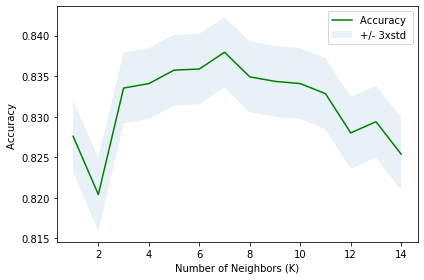

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [17]:
k = 7 # 7 gives the highest test accuracy
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [18]:
# Predict
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 2, 3, 0, 0])

In [19]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.875004317341899
Test set Accuracy:  0.8379610443431413


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
# C = smaller values specify stronger regularization. Default C=1.0
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 3, ..., 0, 0, 3])

In [22]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.66314964, 0.00956942, 0.15519907, 0.17208188],
       [0.46809288, 0.00871801, 0.18776642, 0.33542269],
       [0.31152254, 0.00677514, 0.19317512, 0.48852721],
       ...,
       [0.68305976, 0.00207191, 0.05147791, 0.26339042],
       [0.4736884 , 0.00603274, 0.123418  , 0.39686087],
       [0.30478488, 0.00500897, 0.13631795, 0.55388821]])

In [23]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.875004317341899
Test set Accuracy:  0.6148639314822489


# Support Vector Machine

In [24]:
from sklearn import svm
clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 2, 0, 0, 0])

In [26]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.875004317341899
Test set Accuracy:  0.7581157618455587


# Classifier comparison using Cross - Validation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = [
    ('LR', LogisticRegression(max_iter=1000)),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
]

In [28]:
for name, model in models:
        clf = model
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        print(name, accuracy)

LR 0.6134825252106645
NB 0.2786296449785882
SVM 0.7578394805912418
KNN 0.8357507943086062
DT 0.8223511534742368


Above .score function calculates the model accuracies with the same method cross_val_score  
Below cross_val_score funtion is used to calculate the accuracy of models, as well.

In [29]:
from sklearn.model_selection import cross_val_score, KFold

knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000)
svc = SVC()
dt = DecisionTreeClassifier()
nb = GaussianNB()

knnscores = cross_val_score(knn, X, y, cv=KFold(shuffle=True))   # KFold default value is 5 and we shuffle it with (shuffle=True)
lrscores = cross_val_score(lr, X, y, cv=KFold(shuffle=True))
svcscores = cross_val_score(svc, X, y, cv=KFold(shuffle=True))
dtscores = cross_val_score(dt, X, y, cv=KFold(shuffle=True))
nbscores = cross_val_score(nb, X, y, cv=KFold(shuffle=True))

In [30]:
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (knnscores.mean(), knnscores.std() * 2))
print("LR Accuracy: %0.2f (+/- %0.2f)" % (lrscores.mean(), lrscores.std() * 2))
print("SVM Accuracy: %0.2f (+/- %0.2f)" % (svcscores.mean(), svcscores.std() * 2))
print("DT Accuracy: %0.2f (+/- %0.2f)" % (dtscores.mean(), dtscores.std() * 2))
print("NB Accuracy: %0.2f (+/- %0.2f)" % (nbscores.mean(), nbscores.std() * 2))

KNN Accuracy: 0.83 (+/- 0.01)
LR Accuracy: 0.62 (+/- 0.01)
SVM Accuracy: 0.75 (+/- 0.01)
DT Accuracy: 0.82 (+/- 0.01)
NB Accuracy: 0.28 (+/- 0.01)


Best accuracy is obtained by using K-nearest neighbor model :

1 - KNN  0.84 (+/- 0.00)  
2 - DT 0.83 (+/- 0.01)  
3 - SVM 0.75 (+/- 0.01)  
4 - LR 0.61 (+/- 0.01)  
5 - NB 0.28 (+/- 0.01)

---

# Graphs

In [31]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

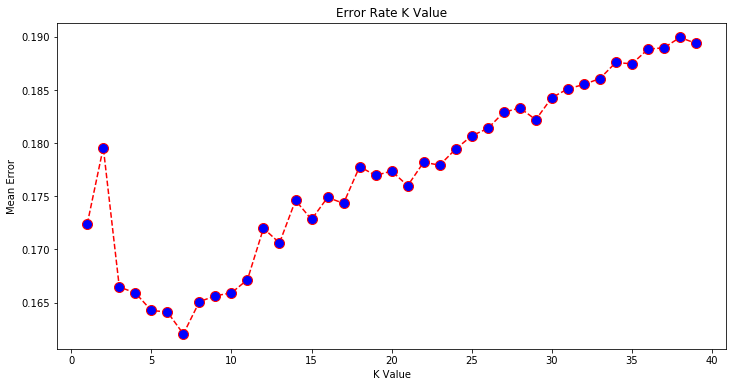

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

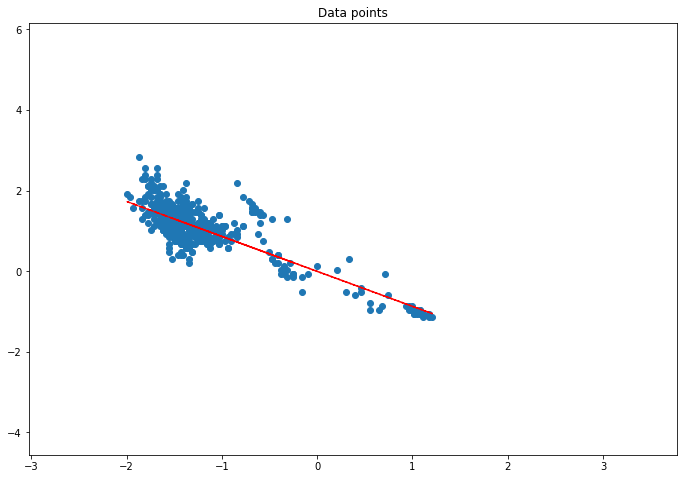

In [33]:
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
n_sample=500
x1=0
x2=5
# Calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
fig=plt.figure()
fig.add_axes([0,0,1.5,1.5])
plt.scatter(X[0:n_sample, x1], X[0:n_sample, x2])  # relationship between mobility indicators can be shown in the dashboard.
m, b = np.polyfit(X[0:n_sample, x1], X[0:n_sample, x2], 1)
plt.plot(X[0:n_sample, x1], m*X[0:n_sample, x1] + b, '--r')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

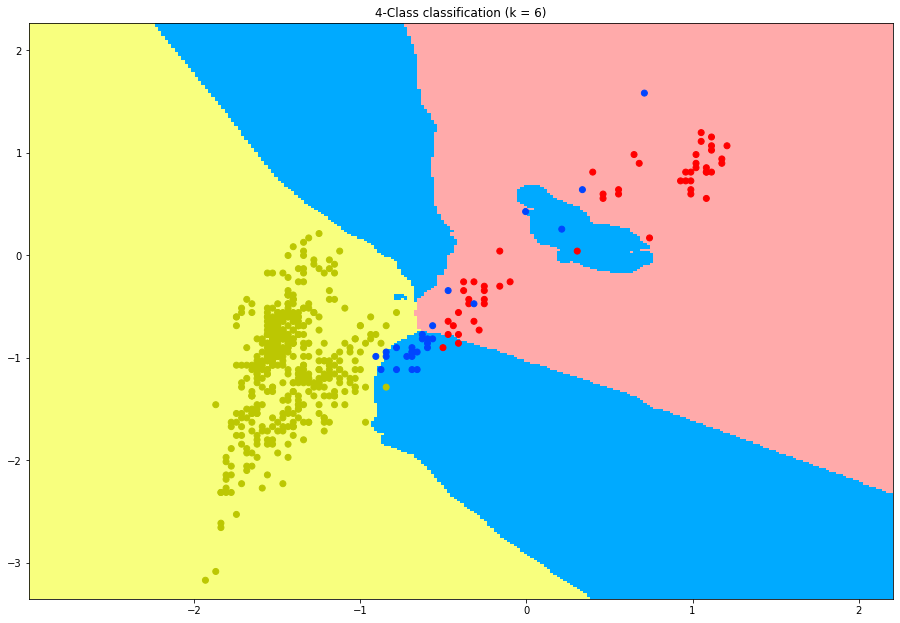

In [34]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier


n_neighbors = 6
n_sample=500
x1=0
x2=4
h = .02
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF','#f8ff7e'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#0045FF','#BCC702'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X[:n_sample,[x1,x2]], y[:n_sample])

# calculate min, max and limits
x_min, x_max = X[:n_sample, x1].min() - 1, X[:n_sample, x1].max() + 1
y_min, y_max = X[:n_sample, x2].min() - 1, X[:n_sample, x2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure().add_axes([0,0,2,2])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points

plt.scatter(X[:n_sample, 0], X[:n_sample, 1], c=y[:n_sample], cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("4-Class classification (k = %i)" % (n_neighbors))
plt.show()

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[3885    6   76  257]
 [  17   25   10    7]
 [ 142   12  675  120]
 [ 387   12  127 1481]]
Normalized confusion matrix
[[0.92 0.   0.02 0.06]
 [0.29 0.42 0.17 0.12]
 [0.15 0.01 0.71 0.13]
 [0.19 0.01 0.06 0.74]]


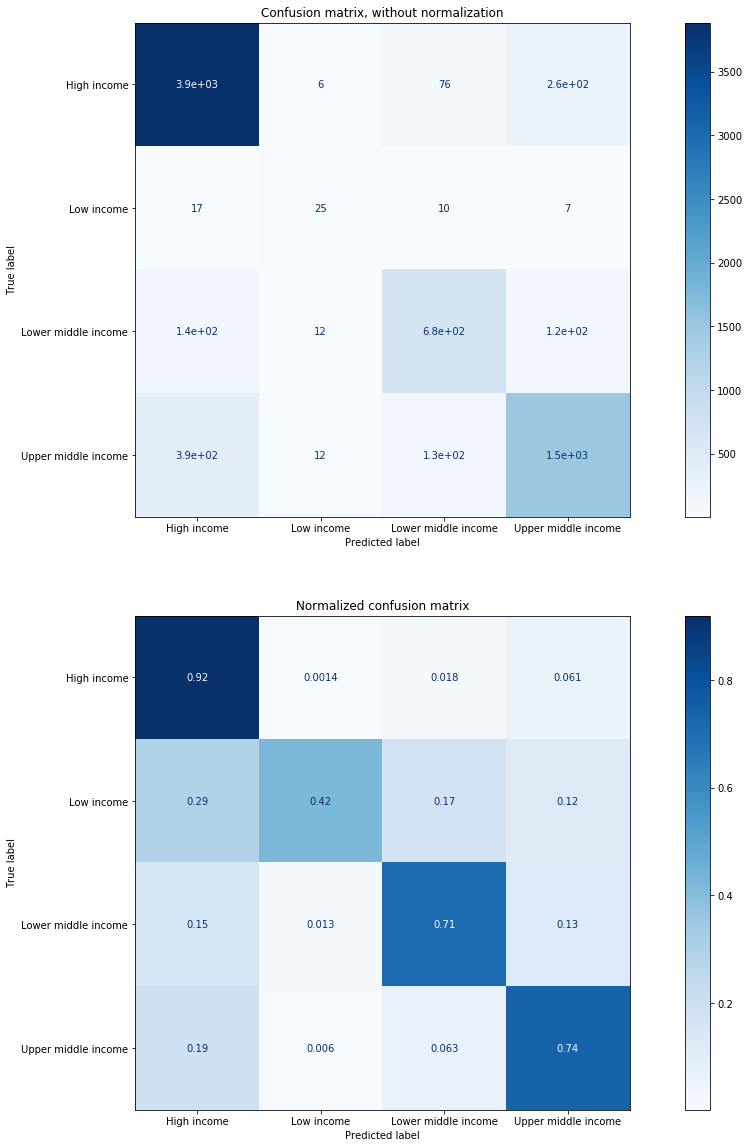

In [35]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


class_names=['High income', 'Low income', 'Lower middle income', 'Upper middle income']
# Split the data into a training set and a test set
n_neighbors=7
# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig= plt.figure(figsize=[20,20])
ax =plt.subplot(2,1,1)
ax2 =plt.subplot(2,1,2)

titles_options = [("Confusion matrix, without normalization", None,ax),
                  ("Normalized confusion matrix", 'true',ax2)]

for title, normalize, axx in titles_options:
    
    disp = plot_confusion_matrix(neigh, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize, ax=axx)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

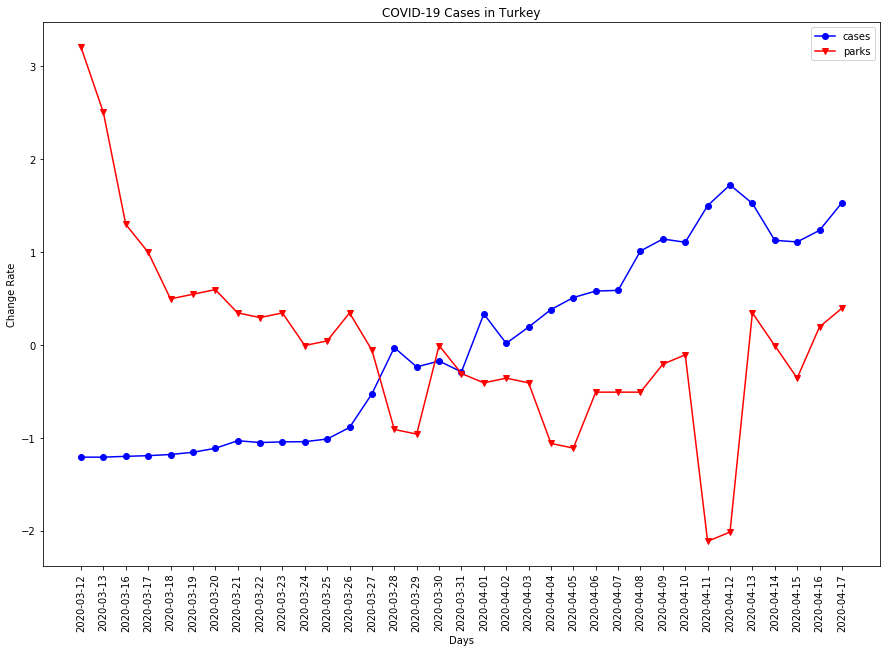

In [36]:
country='Turkey'
indicators = 'cases'
indicators2 = 'parks'

dateb=data[['Date','CountryName','cases','deaths','popData2018', 'Region', 'IncomeGroup',
       'retail_recreation', 'grocery_pharmacy', 'parks', 'transit_stations',
       'workplace', 'residential']]

dateb=dateb[dateb.CountryName==country]
daily=dateb.groupby(['Date'],sort=True).sum()
daily.sort_index(inplace=True)
XX = daily[['retail_recreation', 'grocery_pharmacy', 'parks', 'transit_stations','workplace', 'residential','cases','deaths']]
XX = preprocessing.StandardScaler().fit(XX).transform(XX.astype(float))
dc = {'retail_recreation':0,'grocery_pharmacy':1,'parks':2,'transit_stations':3,'workplace':4,'residential':5,'cases':6,'deaths':7}


fig = plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.set_title("COVID-19 Cases in %s" %(country))
ax.set_xlabel('Days')
ax.set_ylabel('Change Rate')
plt.xticks(rotation=90)
# ax.plot(daily[indicator])
ax.plot(daily.index,XX[:,dc[indicators]], c = 'b' , marker = 'o', label=indicators)
ax.plot(daily.index,XX[:,dc[indicators2]], c = 'r', marker = 'v', label=indicators2)
plt.legend()
plt.show()